In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dset
import torchvision.transforms as T
import torch.optim as optim
import PIL
from PIL import Image
import numpy as np
import os
import tensorflow as tf
import tensorflow_datasets as tfds
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from torchvision.io import read_image
import matplotlib.pyplot as plt
import torch.cuda

c:\Users\Spongebob\anaconda3\envs\ece176\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Dataloader and Device Setup

In [11]:
## https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(os.path.join(img_dir, annotations_file))[:800] # Only grabbing living room examples
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 1])
        label = read_image(label_path)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [12]:
df = pd.read_csv(os.path.join('C:\\Users\\Spongebob\\Documents\\ece176\\final_project\\nyu_data', 'data\\nyu2_train.csv'))
df

,data/nyu2_train/living_room_0038_out/37.jpg,data/nyu2_train/living_room_0038_out/37.png
0,data/nyu2_train/living_room_0038_out/115.jpg,data/nyu2_train/living_room_0038_out/115.png
1,data/nyu2_train/living_room_0038_out/6.jpg,data/nyu2_train/living_room_0038_out/6.png
2,data/nyu2_train/living_room_0038_out/49.jpg,data/nyu2_train/living_room_0038_out/49.png
3,data/nyu2_train/living_room_0038_out/152.jpg,data/nyu2_train/living_room_0038_out/152.png
4,data/nyu2_train/living_room_0038_out/142.jpg,data/nyu2_train/living_room_0038_out/142.png
...,...,...
50682,data/nyu2_train/dining_room_0031_out/441.jpg,data/nyu2_train/dining_room_0031_out/441.png
50683,data/nyu2_train/dining_room_0031_out/365.jpg,data/nyu2_train/dining_room_0031_out/365.png
50684,data/nyu2_train/dining_room_0031_out/447.jpg,data/nyu2_train/dining_room_0031_out/447.png
50685,data/nyu2_train/dining_room_0031_out/90.jpg,data/nyu2_train/dining_room_0031_out/90.png


In [13]:
path = os.path.join('nyu_data', df.iloc[0, 1])
path

'nyu_data\\data/nyu2_train/living_room_0038_out/115.png'

In [14]:
i = read_image(path)
i

tensor([[[ 89,  89,  89,  ..., 103, 102, 102],
         [ 89,  89,  89,  ..., 102, 102, 102],
         [ 89,  89,  89,  ..., 102, 102, 102],
         ...,
         [ 58,  58,  58,  ...,  44,  44,  44],
         [ 58,  58,  58,  ...,  44,  44,  44],
         [ 58,  58,  58,  ...,  44,  44,  44]]], dtype=torch.uint8)

In [15]:
image_dir = 'nyu_data'
train_file = 'data/nyu2_train.csv'
test_file = 'data/nyu2_test.csv'
train_set = CustomImageDataset(train_file, image_dir)
test_set = CustomImageDataset(test_file, image_dir)

print("Training Set Size:", train_set.__len__())
print("Test Set Size:", test_set.__len__())

train_loader = DataLoader(
    train_set, batch_size=8, shuffle=True
)

test_loader = DataLoader(
    test_set, batch_size=8, shuffle=False
)

USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

Training Set Size: 800
Test Set Size: 653
using device: cuda


tensor([[[[255, 245, 255,  ..., 254, 250, 251],
          [255, 255, 250,  ..., 254, 252, 252],
          [246, 255, 255,  ..., 250, 252, 251],
          ...,
          [255, 255, 254,  ..., 251, 251, 251],
          [255, 255, 252,  ..., 242, 244, 244],
          [255, 255, 255,  ..., 251, 249, 247]],

         [[254, 241, 254,  ..., 255, 254, 255],
          [254, 254, 246,  ..., 255, 255, 255],
          [242, 254, 254,  ..., 252, 255, 255],
          ...,
          [254, 252, 253,  ..., 255, 255, 255],
          [254, 253, 251,  ..., 248, 250, 253],
          [253, 255, 255,  ..., 255, 255, 255]],

         [[255, 242, 255,  ..., 255, 253, 254],
          [255, 255, 247,  ..., 255, 255, 255],
          [243, 255, 255,  ..., 251, 255, 254],
          ...,
          [253, 249, 251,  ..., 255, 255, 255],
          [251, 248, 247,  ..., 246, 246, 248],
          [249, 250, 250,  ..., 255, 253, 251]]],


        [[[248, 235, 251,  ..., 255, 255, 255],
          [249, 249, 243,  ..., 255

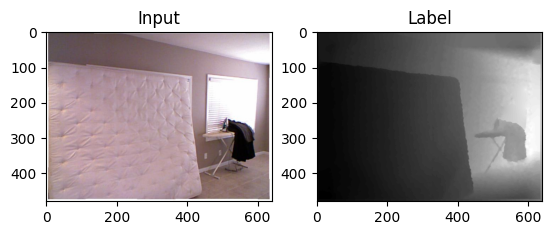

In [16]:
train_features, train_labels = next(iter(train_loader))
print(train_features)
print(train_labels)
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].permute(1,2,0)
label = train_labels[0].permute(1,2,0)
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title('Input')

plt.subplot(1, 2, 2)
plt.imshow(label, cmap='gray')
plt.title('Label')

plt.show()

In [17]:
class DepthBaseModel(nn.Module):
    def __init__(self):
        super(DepthBaseModel, self).__init__()
        self.conv1_1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.relu1_1 = nn.ReLU(inplace=True)
        self.conv1_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.relu1_2 = nn.ReLU(inplace=True)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2_1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.relu2_1 = nn.ReLU(inplace=True)
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.relu2_2 = nn.ReLU(inplace=True)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.relu3_1 = nn.ReLU(inplace=True)
        self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.relu3_2 = nn.ReLU(inplace=True)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.conv11 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
        self.relu7 = nn.ReLU(inplace=True)
        self.conv12 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.relu8 = nn.ReLU(inplace=True)
        
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.conv13 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.relu9 = nn.ReLU(inplace=True)
        self.conv14 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.relu10 = nn.ReLU(inplace=True)

        # Output layer
        self.output = nn.Conv2d(64, 1, kernel_size=1)

    def forward(self, x):
        x = x.to(torch.float32)
        conv1 = self.relu1_2(self.conv1_2(self.relu1_1(self.conv1_1(x))))
        pool1 = self.pool1(conv1)
        
        conv2 = self.relu2_2(self.conv2_2(self.relu2_1(self.conv2_1(pool1))))
        pool2 = self.pool2(conv2)
        
        conv3 = self.relu3_2(self.conv3_2(self.relu3_1(self.conv3_1(pool2))))

        upconv2 = self.upconv2(conv3)
        merge2 = torch.cat([upconv2, conv2], dim=1)
        conv11 = self.relu8(self.conv12(self.relu7(self.conv11(merge2))))

        upconv1 = self.upconv1(conv11)
        merge1 = torch.cat([upconv1, conv1], dim=1)
        conv13 = self.relu10(self.conv14(self.relu9(self.conv13(merge1))))

        output = self.output(conv13)
        return output.to(torch.float32)

In [42]:
model = DepthBaseModel()

# MSE loss can use other loss
loss_func = nn.MSELoss()

# Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    iteration = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        targets = targets.to(torch.float32)
        loss = loss_func(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        if iteration % print_every == 0:
            print(f'{iteration} iterations passed')
        iteration += 1
    epoch_loss = running_loss / len(train_set)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

0 iterations passed
100 iterations passed
Epoch [1/1], Loss: 2093.7061


In [43]:
# From assignment 5 test accuracy implementation 
model.eval()

test_running_loss = 0.0
num_test_samples = 0

# Iterate over the test set
with torch.no_grad():  # Disable gradient computation for inference
    for inputs, targets in test_loader:
        # Forward pass
        outputs = model(inputs)
        
        # Calculate loss
        targets = targets.to(torch.float32)
        loss = loss_func(outputs, targets)
        
        # Update running loss and number of samples
        test_running_loss += loss.item() * inputs.size(0)
        num_test_samples += inputs.size(0)

# Calculate average test loss
test_loss = test_running_loss / num_test_samples
print(f'Test Loss: {test_loss:.4f}')

Test Loss: 2395.8513


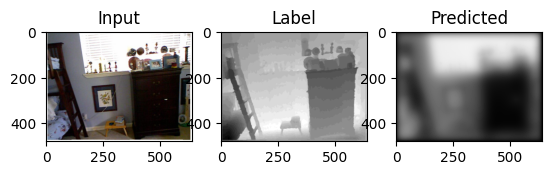

In [53]:
test_feature, test_label = next(iter(test_loader))

with torch.no_grad():
    predict = model(test_feature)
img = test_feature[0].permute(1,2,0)
label = test_label[0].permute(1,2,0)
predict = predict[0].permute(1,2,0)
plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.title('Input')

plt.subplot(1, 3, 2)
plt.imshow(label, cmap='gray')
plt.title('Label')

plt.subplot(1, 3, 3)
plt.imshow(predict, cmap='gray')
plt.title('Predicted')

plt.show()